<a href="https://colab.research.google.com/github/Djaxis/MY-Python-Evolution/blob/main/Sudoku_Solver_Backtraking_Brut_Force_Brice_De_Campos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analyse comparative des méthodes de résolution de SUDOKU.**

Après avoir fait une recherche longue sur les nombreuses techniques de résolution
existantes, vous testez les stratégies suivantes :
1. La méthode de la force brute : il vérifie toutes les combinaisons de chiffres
possible de 1 à 9 jusqu'à ce qu'une solution du sudoku soit trouvée.
2. La méthode du Backtracking : il fonctionne en choisissant une case vide et en
essayant tous les chiffres possibles de 1 à 9. Si un chiffre entre en conflit avec les
règles du Sudoku, l'algorithme revient, par récursivité, à la case précédemment
remplie et essaie le chiffre suivant. Ce processus est répété jusqu'à ce que le
Sudoku soit résolu.

Exécution...
Votre code doit être propre et orienté objet. Vous devrez étudier la complexité
algorithmique de vos 2 méthodes et temps d'exécution. Comparez ces deux critères

sous forme de tableau. Quelles sont vos observations ? Concluez sur l'algorithme le
plus performant parmi les 2 étudiés. Cette analyse doit être proprement rédigée dans
un fichier de type Markdown.

Ce repository devra contenir les éléments suivants :
1. Les différents fichiers Python de votre implémentation des 2 différentes
stratégies de résolution d’une grille de Sudoku :

a. Un fichier pour la classe de la méthode de force brute.

b. Un fichier pour la classe de la méthode du Backtracking.

c. Un fichier qui récupère un exemple de Sudoku, qui appelle l’une des
méthodes de résolution et affiche la solution dans le terminal ainsi que
dans une fenêtre Pygame.


2. Un README.md associé à votre repository, contenant votre analyse comparative
des méthodes de résolution.

### **MON ANNALYSE COMPARATIVE DE COMPLEXITE - METHODES DE RESOLUTIONS**

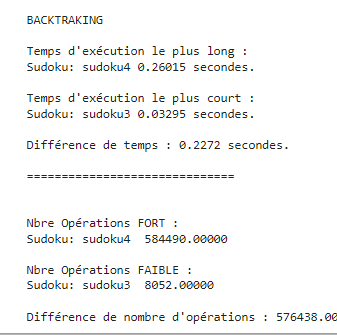

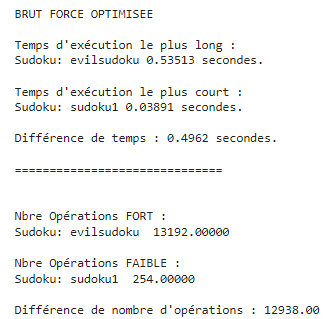

## **On peut observer une fine différence de temps et du nombre de calculs exécutés entre les deux premières solutions. Or, la méthode brute force pure est excessivement lente, et prends près de 35 minutes pour résoudre un seul sudoku.**

# On pourrait penser le contraire en observant que le code des deux premières solutions est plus complexe et plus long. Cependant, la lecture linéaire de l'algo en brute force pure augmente le nombre de tentatives par case de n*24 au minimum.


Résolution de Sudoku avec différentes approches : "backtracking", "bruteforce_fonction", et "brute_force_pure". Voici une brève analyse comparative de ces méthodes :

1. **Backtracking**:
    * C'est l'approche la plus courante pour résoudre les puzzles Sudoku.
    * Elle consiste à essayer un chiffre possible dans une case, puis à passer à la suivante. Si un problème est rencontré plus tard, elle revient en arrière (d'où le terme "backtracking") et essaye un autre chiffre.
    * **Complexité** : Cette méthode a une complexité exponentielle dans le pire des cas. Cependant, dans la plupart des cas réels, grâce à l'efficacité du processus d'élimination (via la fonction `est_valide`), elle est beaucoup plus rapide que l'approche de force brute pure.

2. **bruteforce_fonction**:
    * Cette méthode est similaire à l'approche "backtracking", mais elle utilise une liste des possibles pour chaque cellule vide plutôt que de simplement essayer tous les chiffres de 1 à 9.
    * **Complexité** : Tout comme le backtracking, cette méthode a également une complexité exponentielle dans le pire des cas. Toutefois, elle pourrait être un peu plus efficace dans certains cas grâce à l'utilisation des listes de possibilités, qui réduisent le nombre de choix à considérer.

3. **brute_force_pure**:
    * Cette méthode essaie chaque combinaison possible pour les cellules vides jusqu'à ce qu'une solution valide soit trouvée.
    * **Complexité** : Cette méthode a la pire complexité de toutes, car elle est véritablement exponentielle sans aucun processus d'élimination préalable. Elle peut être très lente, même pour des grilles avec relativement peu de cellules vides.

**Conclusion**:

- Si vous recherchez l'efficacité, la méthode backtracking est probablement la meilleure option pour la plupart des puzzles Sudoku. L'approche "bruteforce_fonction" peut également être efficace, surtout si elle est bien implémentée.
- L'approche "brute_force_pure" est généralement la moins efficace et est rarement utilisée pour résoudre des puzzles Sudoku, sauf peut-être pour des grilles très petites ou des grilles avec un très grand nombre de chiffres déjà fournis.

N'oubliez pas que pour obtenir une comparaison objective des performances de ces méthodes, vous devriez les exécuter sur plusieurs grilles de Sudoku de différentes difficultés et mesurer le temps d'exécution ainsi que le nombre d'opérations effectuées.

### **SOLUTION BACKTRACKING**

In [1]:
  #####     SOLUTION Backtacking #####

  import pygame
  import time


  # Chaîne initiale
  sudoku1 = """
  _729___3_
  __1__6_8_
  ____4__6_
  96___41_8
  _487_5_96
  __56_8__3
  ___4_2_1_
  85__6_327
  1__85____"""

  sudoku2 = """
  7__92_4__
  ______7__
  __4__8312
  4____25__
  2___1___3
  __85____4
  8432__6__
  __5______
  __2_64__5"""

  sudoku3 = """
  __9_85_63
  _7_96____
  5_1__4___
  __67_3__4
  _4_21_39_
  8___9__57
  9845__6__
  __7649_3_
  61__2__4_"""

  sudoku4 = """
  3______8_
  1__6_3__2
  56_______
  _8_1__97_
  ___5_____
  2_9__4___
  __1___62_
  _______43
  _7__5_1__"""

  evilsudoku = """
  __9_6____
  ___3___1_
  _45_1___6
  _____82__
  _61_3___5
  7________
  9___4____
  _742__5__
  3_______7"""


  # Placez vos sudokus dans une liste:
  sudokus = [sudoku1, sudoku2, sudoku3 ,sudoku4, evilsudoku]

  # Conversion de la chaîne STR  en tableau d'ENTIER
  def string_to_table(s):

      lines = s.strip().split('\n')  # Enlever les espaces blancs avec strip() puis diviser en lignes lors du saut de ligne
      convert_char = lambda ch: int(ch) if ch.isdigit() else 0  # Conversion des caractères en digit.

      tableau = [list(map(convert_char, line)) for line in lines]  # Construisez le tableau ligne par ligne

      return tableau


  # Début du chronométrage
  start_time = time.time()

  # Introduisez un compteur global
  operations_countbf = 0


  ################     CHERCHER DANS LES CASES EN  backtracking    ################
  def est_valide(board, row, col, num):
      global operations_countbf # COMPTEUR nbr d'opération pr cal de complexité > déclarer la variable comme global pour pouvoir la modifier

      # Vérifiez si le 'num' n'existe pas déjà dans la rangée 'row'
      for x in range(9):
          operations_countbf += 1   # Ajoutez cette ligne pour compter la vérification
          if board[row][x] == num:
              return False

      # Vérifiez si le 'num' n'existe pas déjà dans la colonne 'col'
      for x in range(9):
          operations_countbf += 1   # Ajoutez cette ligne pour compter la vérification
          if board[x][col] == num:
              return False

      # Vérifiez le bloc 3x3 pour voir si le 'num' existe
      startRow, startCol = 3 * (row // 3), 3 * (col // 3)
      for i in range(3):
          for j in range(3):
              operations_countbf += 1   # Ajoutez cette ligne pour compter la vérification
              if board[i + startRow][j + startCol] == num:
                  return False
      return True
  operations_countbf += 1   # COMPTEUR D'OPERATIONS pr cal de complexité Incrémentez le compteur chaque fois que vous essayez un chiffre


  #######################     SOLVE   EN backtracking    ###########################
  def solve(board):
      global operations_count  # COMPTEUR nbr d'opération pr cal de complexité > déclarer la variable comme global pour pouvoir la modifier

      # Trouvez une cellule vide
      for i in range(9):
          for j in range(9):
              if board[i][j] == 0:
                  for num in range(1, 10):    # Essayez les numéros de 1 à 9 pour cette cellule
                      if est_valide(board, i, j, num):
                          board[i][j] = num
                          if solve(board):  # Récursivement essayer de remplir les autres cellules
                              return True  # Si le tableau est complet, renvoyez True
                          board[i][j] = 0  # Si ce choix de numéro ne fonctionne pas, revenez en arrière (backtrack)
                  return False  # Si aucune possibilité ne fonctionne pour cette cellule, revenez en arrière
      return True  # Si toutes les cellules sont remplies, nous avons terminé!

  operations_countbf += 1   # COMPTEUR D'OPERATIONS pr cal de complexité Incrémentez le compteur chaque fois que vous essayez un chiffre


  ##### Indentation de la mise en forme en sudoku design  dans boucle chaque
  def print_sudoku(grid):
      for i, row in enumerate(grid):
          if i % 3 == 0 and i != 0:
              print("-" * 21)  # Séparateurs pour les régions horizontales
          for j, num in enumerate(row):
              if j % 3 == 0 and j != 0:
                  print("|", end=" ")  # Séparateurs pour les régions verticales
              print(num, end=" ")
          print()

  # Définition de la fonction pour obtenir le nom de la variable
  def get_var_name(var):
      for name, value in globals().items():
          if value is var:
              return name


  results_temps = []
  result_op_countBT = []
  ###############    BOUCLE sur CHAQUE SUDOKU AFFICHAGE ET LEGEND     ########

  for chaque in sudokus:
      operations_countbf = 0   # réinitialiser LE COMPTEUR D'OPERATION pour chaque NOUVEAU Sudoku
      print(get_var_name(chaque))

      # Itérer sur chaque sudoku, convertir, puis afficher
      #print("\n" + "-"*20 + "\n")  # Séparateur pour rendre la sortie plus claire
      print("AVANT Résolution:")
      tableau = string_to_table(chaque)

      # Début du chronométrage
      start_time = time.time()


      ########   IMPRESSION   ########

      print_sudoku(tableau)  # Affiche Sudoku initial Avec print_sudoku


      solve(tableau)  # Résolvez le Sudoku

      end_time = time.time()
      elapsed_timebf = end_time - start_time


      print("\n" + get_var_name(chaque) + " APRES Résolution")

      print(f"L'algorithme a pris {elapsed_timebf:.5f} secondes pour s'exécuter.")
      print(f"Nombre d'opérations effectuées: {operations_countbf}")

      print_sudoku(tableau)  # Affichez le Sudoku résolu avec le format souhaité

      print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire

      print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire


      # Ajout des résultats à la liste
      results_temps.append((get_var_name(chaque), elapsed_timebf))

      # Ajout des résultats à la liste
      result_op_countBT.append((get_var_name(chaque), operations_countbf))



  # Trie par temps d'exécution ordre décroissant
  sorted_temps_longBT = sorted(results_temps, key=lambda x: x[1], reverse=True)
  # Trie par temps d'exécution ordre croissant
  sorted_temps_courtBT = sorted(results_temps, key=lambda x: x[1])

  print("BACKTRAKING")

  # Pour afficher les résultats :
  print("\nTemps d'exécution le plus long :")
  print(f"Sudoku: {sorted_temps_longBT[0][0]} {sorted_temps_longBT[0][1]:.5f} secondes.")
  print("\nTemps d'exécution le plus court :")
  print(f"Sudoku: {sorted_temps_courtBT[0][0]} {sorted_temps_courtBT[0][1]:.5f} secondes.")

  difference_tempsBT = sorted_temps_longBT[0][1] - sorted_temps_courtBT[0][1]
  print(f"\nDifférence de temps : {difference_tempsBT:.4f} secondes.")


  print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire


  # Trie par nbre Opérations ordre décroissant
  sorted_op_countupBT = sorted(result_op_countBT, key=lambda x: x[1], reverse=True)
  # Trie nbre Opérations ordre croissant
  sorted_op_countdownBT = sorted(result_op_countBT, key=lambda x: x[1])

  print("\nNbre Opérations FORT :")
  print(f"Sudoku: {sorted_op_countupBT[0][0]}  {sorted_op_countupBT[0][1]:.5f}")
  print("\nNbre Opérations FAIBLE :")
  print(f"Sudoku: {sorted_op_countdownBT[0][0]}  {sorted_op_countdownBT[0][1]:.5f}")

  difference_opBT = sorted_op_countupBT[0][1] - sorted_op_countdownBT[0][1]
  print(f"\nDifférence de nombre d'opérations : {difference_opBT:.2f}")


pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
sudoku1
AVANT Résolution:
0 7 2 | 9 0 0 | 0 3 0 
0 0 1 | 0 0 6 | 0 8 0 
0 0 0 | 0 4 0 | 0 6 0 
---------------------
9 6 0 | 0 0 4 | 1 0 8 
0 4 8 | 7 0 5 | 0 9 6 
0 0 5 | 6 0 8 | 0 0 3 
---------------------
0 0 0 | 4 0 2 | 0 1 0 
8 5 0 | 0 6 0 | 3 2 7 
1 0 0 | 8 5 0 | 0 0 0 

sudoku1 APRES Résolution
L'algorithme a pris 0.01066 secondes pour s'exécuter.
Nombre d'opérations effectuées: 19630
6 7 2 | 9 8 1 | 5 3 4 
4 3 1 | 5 7 6 | 9 8 2 
5 8 9 | 2 4 3 | 7 6 1 
---------------------
9 6 7 | 3 2 4 | 1 5 8 
3 4 8 | 7 1 5 | 2 9 6 
2 1 5 | 6 9 8 | 4 7 3 
---------------------
7 9 6 | 4 3 2 | 8 1 5 
8 5 4 | 1 6 9 | 3 2 7 
1 2 3 | 8 5 7 | 6 4 9 




sudoku2
AVANT Résolution:
7 0 0 | 9 2 0 | 4 0 0 
0 0 0 | 0 0 0 | 7 0 0 
0 0 4 | 0 0 8 | 3 1 2 
---------------------
4 0 0 | 0 0 2 | 5 0 0 
2 0 0 | 0 1 0 | 0 0 3 
0 0 8 | 5 0 0 | 0 0 4 
---------------------
8 4 3 | 2 0 0 | 6 0 0 
0 0 5

### **SOLUTION BRUT FORCE OPTIMISEE**

In [2]:
#######  SOLUTION FORCE    #######

from os import stat_result
import pygame



# Chaîne initiale
sudoku1 = """
_729___3_
__1__6_8_
____4__6_
96___41_8
_487_5_96
__56_8__3
___4_2_1_
85__6_327
1__85____"""

sudoku2 = """
7__92_4__
______7__
__4__8312
4____25__
2___1___3
__85____4
8432__6__
__5______
__2_64__5"""

sudoku3 = """
__9_85_63
_7_96____
5_1__4___
__67_3__4
_4_21_39_
8___9__57
9845__6__
__7649_3_
61__2__4_"""

sudoku4 = """
3______8_
1__6_3__2
56_______
_8_1__97_
___5_____
2_9__4___
__1___62_
_______43
_7__5_1__"""

evilsudoku = """
__9_6____
___3___1_
_45_1___6
_____82__
_61_3___5
7________
9___4____
_742__5__
3_______7"""


# Placez vos sudokus dans une liste:
sudokus = [sudoku1, sudoku2, sudoku3 ,sudoku4, evilsudoku]

# Conversion de la chaîne STR  en tableau d'ENTIER
def string_to_table(s):
    lines = s.strip().split('\n')  # Enlever les espaces blancs avec strip() puis diviser en lignes lors du saut de ligne
    convert_char = lambda ch: int(ch) if ch.isdigit() else 0  # Conversion des caractères en digit.
    tableau = [list(map(convert_char, line)) for line in lines]  # Construisez le tableau ligne par ligne
    return tableau

operations_count = 0

start_timebt = time.time()
##################  LISTE DES POSSIBLES ET FONCTIONS  #################################

def list_the_possibilities(liste, x, y):   # Initialiser une liste avec toutes les possibilités pour une case de Sudoku (de 1 à 9).

    global operations_count                # COMPTEUR nbr d'opération pr cal de complexité > déclarer la variable comme global pour pouvoir la modifier

    possibility = [1, 2, 3, 4, 5, 6, 7, 8, 9]

    # Parcourir toutes les cases de la colonne y et supprimer les chiffres qui existent déjà.
    for number in range(9):
        try:
            possibility.remove(liste[number][y])
        except:
            pass
        # Parcourir toutes les cases de la ligne x et supprimer les chiffres qui existent déjà.
        try:
            possibility.remove(liste[x][number])
        except:
            pass

    # Identifier le bloc 3x3 (un des 9 petits carrés) dans lequel se trouve la case (x, y).
    X, Y = (x // 3) * 3, (y // 3) * 3

    for x in range(X, X + 3):         # Parcourir toutes les cases du bloc 3x3 et supprimer les chiffres qui existent déjà.
        for y in range(Y, Y + 3):
            try:
                possibility.remove(liste[x][y])
            except:
                pass
    return possibility    # Retourner la liste des chiffres possibles pour la case (x, y).




# ... [Omission des définitions initiales pour la concision]
def brutforce_fonction(tableau):
    global operations_count
    for x in range(9):  # Pour chaque ligne
        for y in range(9):  # Pour chaque colonne
            # Si la case est vide
            if tableau[x][y] == 0:
                # Obtenir les possibilités pour cette case
                possibility = list_the_possibilities(tableau, x, y)
                for p in possibility:  # Essayer chaque possibilité
                    tableau[x][y] = p

                    operations_count += 1   # COMPTEUR D'OPERATIONS pr cal de complexité Incrémentez le compteur chaque fois que vous essayez un chiffre

                    # Appel récursif pour essayer de remplir le reste du tableau
                    if brutforce_fonction(tableau):

                        return True  # Renvoyer True si une solution est trouvée
                    tableau[x][y] = 0  # Remettre la case à 0 si aucune solution n'est trouvée
                return False  # Renvoyer False si aucune solution n'est trouvée pour la configuration actuelle
    return True  # Toutes les cases sont remplies, solution trouvée




# Définition de la fonction pour obtenir le nom de la variable
def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name

# Définition de la fonction pour afficher le Sudoku
def print_sudoku(grid):
    for i, row in enumerate(grid):
        if i % 3 == 0 and i != 0:
            print("-" * 21)  # Séparateurs pour les régions horizontales
        for j, num in enumerate(row):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")  # Séparateurs pour les régions verticales
            print(num, end=" ")
        print()

results_temps = [] # ici j'initialise le stock pr y mettre mes données récoltées nomsudo temps nbr d'op etc...
result_op_count = []
############## BOUCLE sur CHAQUE SUDOKU AFFICHAGE ET LEGEND ##########
for chaque in sudokus:
    # Affichage du nom de la variable
    print(get_var_name(chaque))

    # Itérer sur chaque sudoku, convertir, puis backtracking
    tableau = string_to_table(chaque)
    print("AVANT Résolution:")
    print_sudoku(tableau)  # Affichez le Sudoku initial avec le format souhaité

    print("\n" + get_var_name(chaque) + " APRES Résolution en brut force optimisée")

    print(f"Nombre d'opérations effectuées: {operations_count}")


    brutforce_fonction(tableau)
    end_time = time.time()
    elapsed_timetra = end_time - start_timebt
    print(f"L'algorithme Temps Exécution {elapsed_timetra:.5f} secondes.")
    print_sudoku(tableau)  # Ceci affichera le Sudoku après la résolution.


    print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire


    # Ajout des résultats à la liste
    results_temps.append((get_var_name(chaque), elapsed_timetra))

    # Ajout des résultats à la liste
    result_op_count.append((get_var_name(chaque), operations_count))



# Trie par temps d'exécution ordre décroissant
sorted_temps_long = sorted(results_temps, key=lambda x: x[1], reverse=True)
# Trie par temps d'exécution ordre croissant
sorted_temps_court = sorted(results_temps, key=lambda x: x[1])

print("BRUT FORCE OPTIMISEE")

# Pour afficher les résultats :
print("\nTemps d'exécution le plus long :")
print(f"Sudoku: {sorted_temps_long[0][0]} {sorted_temps_long[0][1]:.5f} secondes.")
print("\nTemps d'exécution le plus court :")
print(f"Sudoku: {sorted_temps_court[0][0]} {sorted_temps_court[0][1]:.5f} secondes.")

difference_temps = sorted_temps_long[0][1] - sorted_temps_court[0][1]
print(f"\nDifférence de temps : {difference_temps:.4f} secondes.")


print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire


# Trie par nbre Opérations ordre décroissant
sorted_op_countup = sorted(result_op_count, key=lambda x: x[1], reverse=True)
# Trie nbre Opérations ordre croissant
sorted_op_countdown = sorted(result_op_count, key=lambda x: x[1])

print("\nNbre Opérations FORT :")
print(f"Sudoku: {sorted_op_countup[0][0]}  {sorted_op_countup[0][1]:.5f}")
print("\nNbre Opérations FAIBLE :")
print(f"Sudoku: {sorted_op_countdown[0][0]}  {sorted_op_countdown[0][1]:.5f}")

difference_op = sorted_op_countup[0][1] - sorted_op_countdown[0][1]
print(f"\nDifférence de nombre d'opérations : {difference_op:.2f}")

sudoku1
AVANT Résolution:
0 7 2 | 9 0 0 | 0 3 0 
0 0 1 | 0 0 6 | 0 8 0 
0 0 0 | 0 4 0 | 0 6 0 
---------------------
9 6 0 | 0 0 4 | 1 0 8 
0 4 8 | 7 0 5 | 0 9 6 
0 0 5 | 6 0 8 | 0 0 3 
---------------------
0 0 0 | 4 0 2 | 0 1 0 
8 5 0 | 0 6 0 | 3 2 7 
1 0 0 | 8 5 0 | 0 0 0 

sudoku1 APRES Résolution en brut force optimisée
Nombre d'opérations effectuées: 0
L'algorithme Temps Exécution 0.03315 secondes.
6 7 2 | 9 8 1 | 5 3 4 
4 3 1 | 5 7 6 | 9 8 2 
5 8 9 | 2 4 3 | 7 6 1 
---------------------
9 6 7 | 3 2 4 | 1 5 8 
3 4 8 | 7 1 5 | 2 9 6 
2 1 5 | 6 9 8 | 4 7 3 
---------------------
7 9 6 | 4 3 2 | 8 1 5 
8 5 4 | 1 6 9 | 3 2 7 
1 2 3 | 8 5 7 | 6 4 9 


sudoku2
AVANT Résolution:
7 0 0 | 9 2 0 | 4 0 0 
0 0 0 | 0 0 0 | 7 0 0 
0 0 4 | 0 0 8 | 3 1 2 
---------------------
4 0 0 | 0 0 2 | 5 0 0 
2 0 0 | 0 1 0 | 0 0 3 
0 0 8 | 5 0 0 | 0 0 4 
---------------------
8 4 3 | 2 0 0 | 6 0 0 
0 0 5 | 0 0 0 | 0 0 0 
0 0 2 | 0 6 4 | 0 0 5 

sudoku2 APRES Résolution en brut force optimisée
Nombre d'opé

In [3]:
print("DIFFERRENCE ENTRE BACKTRACKING   ET  BRUT FORCE OPTIMISEE")
print("\n" + "="*30 + "\n")  # Séparateur

print("BACKTRACKING")

difference_tempsBT = sorted_temps_longBT[0][1] - sorted_temps_courtBT[0][1]
print(f"\nDifférence de temps : {difference_tempsBT:.4f} secondes.")

difference_opBT = sorted_op_countup[0][1] - sorted_op_countdown[0][1]
print(f"\nDifférence de nombre d'opérations : {difference_opBT:.2f}")


print("\n" + "-"*30 + "\n")  # Séparateur pour rendre la sortie plus claire


print("BRUT FORCE OPTIMISEE")

difference_temps = sorted_temps_long[0][1] - sorted_temps_court[0][1]
print(f"\nDifférence de temps : {difference_temps:.4f} secondes.")

difference_op = sorted_op_countupBT[0][1] - sorted_op_countdownBT[0][1]
print(f"\nDifférence de nombre d'opérations : {difference_op:.2f}")



DIFFERRENCE ENTRE BACKTRACKING   ET  BRUT FORCE OPTIMISEE


BACKTRACKING

Différence de temps : 0.2417 secondes.

Différence de nombre d'opérations : 12938.00

------------------------------

BRUT FORCE OPTIMISEE

Différence de temps : 0.3825 secondes.

Différence de nombre d'opérations : 576438.00


### **SOLUTION BRUT FORCE LA PLUS PURE**
Approche avec itertools.product pour générer toutes les combinaisons possibles de chiffres pour les cellules vides, puis vérifie chaque combinaison pour sa validité. C'est donc déjà un exemple de brute force pure.

In [ ]:
#######  SOLUTION BRUT FORCE PURE ET TRES LENTE   #######

from itertools import product
import time


# Chaîne initiale
sudoku1 = """
_729___3_
__1__6_8_
____4__6_
96___41_8
_487_5_96
__56_8__3
___4_2_1_
85__6_327
1__85____"""

sudoku2 = """
7__92_4__
______7__
__4__8312
4____25__
2___1___3
__85____4
8432__6__
__5______
__2_64__5"""

sudoku3 = """
__9_85_63
_7_96____
5_1__4___
__67_3__4
_4_21_39_
8___9__57
9845__6__
__7649_3_
61__2__4_"""

sudoku4 = """
3______8_
1__6_3__2
56_______
_8_1__97_
___5_____
2_9__4___
__1___62_
_______43
_7__5_1__"""

evilsudoku = """
__9_6____
___3___1_
_45_1___6
_____82__
_61_3___5
7________
9___4____
_742__5__
3_______7"""


# Placez vos sudokus dans une liste:
sudokus = [sudoku1, sudoku2, sudoku3 ,sudoku4, evilsudoku]

# Conversion de la chaîne STR  en tableau d'ENTIER
def string_to_table(s):
    lines = s.strip().split('\n')  # Enlever les espaces blancs avec strip() puis diviser en lignes lors du saut de ligne
    convert_char = lambda ch: int(ch) if ch.isdigit() else 0  # Conversion des caractères en digit.
    tableau = [list(map(convert_char, line)) for line in lines]  # Construisez le tableau ligne par ligne
    return tableau

operations_count = 0




######################################################################################

def brute_force_pure(grid):
    empty_cells = [(i, j) for i in range(9) for j in range(9) if grid[i][j] == 0]
    for combination in product(range(1, 10), repeat=len(empty_cells)):
        for idx, (i, j) in enumerate(empty_cells):
            grid[i][j] = combination[idx]

        if is_solution_valid(grid):
            return True

    return False

def is_valid(grid, row, col, num):
    # Vérifiez la ligne
    for x in range(9):
        if grid[row][x] == num:
            return False

    # Vérifiez la colonne
    for x in range(9):
        if grid[x][col] == num:
            return False

    # Vérifiez le bloc 3x3
    startRow, startCol = 3 * (row // 3), 3 * (col // 3)
    for i in range(3):
        for j in range(3):
            if grid[i + startRow][j + startCol] == num:
                return False

def is_solution_valid(grid):
    # Vérifiez si le tableau est une solution valide pour le sudoku.
    for i in range(9):
        for j in range(9):
            num = grid[i][j]
            grid[i][j] = 0  # Supprimer temporairement le chiffre pour vérifier
            if not is_valid(grid, i, j, num):
                grid[i][j] = num  # Remettre le chiffre
                return False
            grid[i][j] = num  # Remettre le chiffre
    return True

# Ajoutez ici la fonction is_valid que vous avez mentionnée.

##################################################################




# Définition de la fonction pour obtenir le nom de la variable
def get_var_name(var):
    for name, value in globals().items():
        if value is var:
            return name

# Définition de la fonction pour afficher le Sudoku
def print_sudoku(grid):
    for i, row in enumerate(grid):
        if i % 3 == 0 and i != 0:
            print("-" * 21)  # Séparateurs pour les régions horizontales
        for j, num in enumerate(row):
            if j % 3 == 0 and j != 0:
                print("|", end=" ")  # Séparateurs pour les régions verticales
            print(num, end=" ")
        print()

results = [] # ici j'initialise le stock pr y mettre mes données récoltées nomsudo temps nbr d'op etc...

############## BOUCLE sur CHAQUE SUDOKU AFFICHAGE ET LEGEND ##########
for chaque in sudokus:
    # Affichage du nom de la variable
    print(get_var_name(chaque))

    # Itérer sur chaque sudoku, convertir, puis backtracking
    tableau = string_to_table(chaque)
    print("AVANT Résolution:")
    print_sudoku(tableau)  # Affichez le Sudoku initial avec le format souhaité


### compte le temps - fait appel à brute_force_solve et affiche
    print("\n" + get_var_name(chaque) + " APRES Résolution")
    start_timebf = time.time()
    brute_force_pure(tableau)   #appel de la fonction BFS
    end_time=time.time()
    elapsed_timetra = end_time - start_timebf

    print(f"L'algorithme a pris {elapsed_timetra:.5f} secondes pour s'exécuter.")
    print(f"Nombre d'opérations effectuées: {operations_count}")
    print_sudoku(tableau)  # Ceci affichera le Sudoku après la résolution.

    print("\n" + "="*30 + "\n")  # Séparateur pour rendre la sortie plus claire
###fin


sudoku1
AVANT Résolution:
0 7 2 | 9 0 0 | 0 3 0 
0 0 1 | 0 0 6 | 0 8 0 
0 0 0 | 0 4 0 | 0 6 0 
---------------------
9 6 0 | 0 0 4 | 1 0 8 
0 4 8 | 7 0 5 | 0 9 6 
0 0 5 | 6 0 8 | 0 0 3 
---------------------
0 0 0 | 4 0 2 | 0 1 0 
8 5 0 | 0 6 0 | 3 2 7 
1 0 0 | 8 5 0 | 0 0 0 

sudoku1 APRES Résolution


### **COMPLEXITE ALGORITHMIQUE**

## **COMPLEXITE ALGORITHMIQUE EXPLICATION **

Estimer le nombre d'opérations qu'un algorithme effectue en fonction de la taille de ses entrées.

Mesure qui permet de quantifier la performance d'un algorithme en fonction de la taille de ses entrées.

Cette performance peut être quantifiée en termes de temps (combien de temps prend l'algorithme pour s'exécuter) ou d'espace (combien de mémoire l'algorithme utilise).


La complexité algorithmique est une évaluation théorique du nombre d'opérations nécessaires pour exécuter un algorithme en fonction de la taille de l'entrée. Le temps d'exécution réel et le nombre d'opérations effectuées peuvent donner une idée de la performance de l'algorithme, mais ne reflètent pas nécessairement la complexité algorithmique. Par exemple, un algorithme qui a une complexité de O(n²) pourrait être plus rapide en pratique qu'un algorithme
O(nlogn) pour de petites valeurs de n, mais beaucoup plus lent pour de grandes valeurs de n.

**1. Complexité temporelle**
Vulgairement : C'est combien de temps un algorithme prend pour s'exécuter.

Mathématiquement : Si T(n) est le temps que prend un algorithme pour une entrée de taille n, alors la complexité temporelle est souvent exprimée en termes de "grand O". Par exemple, O(n), O(n^2), O(logn), etc.

**2. Complexité spatiale**
Vulgairement : C'est combien de mémoire (ou d'espace) un algorithme utilise pendant son exécution.

Mathématiquement : Si S(n) est l'espace utilisé par un algorithme pour une entrée de taille n, alors la complexité spatiale peut également être exprimée en termes de "grand O".

**Exemples de complexité :**


Complexité linéaire - O(n)
Vulgairement : Si vous avez 10 éléments, cela prend 10 unités de temps. 100 éléments prendront 100 unités de temps.
Exemple : Parcourir une liste de bout en bout.

Complexité logarithmique - O(logn)
Vulgairement : À chaque étape, vous divisez le problème par deux. Donc, même si vous doublez la taille de votre entrée, le temps ne doublera pas.
Exemple : Recherche binaire.

Complexité quadratique - O(n^2)
Vulgairement : Si vous avez 10 éléments, cela prend 100 unités de temps. 20 éléments prendront 400 unités de temps.
Exemple : Deux boucles imbriquées parcourant une liste.

Complexité constante - O(1)
Vulgairement : Peu importe la taille de l'entrée, cela prend toujours le même temps.
Exemple : Accéder à un élément dans un tableau par son indice.

Pourquoi c'est important en informatique :
Lors de la conception d'algorithmes ou de systèmes, il est essentiel de comprendre la complexité pour garantir que les solutions sont efficaces et peuvent gérer les charges de travail attendues. Une mauvaise complexité peut entraîner des retards importants, une utilisation excessive de ressources ou, dans certains cas, rendre une tâche pratiquement impossible à accomplir en temps utile.



**Pour obtenir une image complète de la complexité algorithmique, analyses l'algorithme lui-même plutôt que ses performances sur une seule instance. Voici les étapes à suivre:**

1. **Analyse du Code** : Étudiez chaque partie de votre code et identifiez les boucles, les appels récursifs et d'autres structures qui affectent le temps d'exécution.

    - Pour chaque boucle, déterminez combien de fois elle tourne en fonction de la taille de l'entrée (dans ce cas, un Sudoku est toujours de taille 9x9, mais le nombre d'éléments pré-remplis peut varier).
    - Pour les appels récursifs (comme dans le backtracking), essayez de comprendre combien de fois la fonction pourrait être rappelée dans le pire des cas.

2. **Considérations Pratiques** : Il est possible que certains cas théoriques ne se produisent jamais en pratique. Par exemple, il pourrait y avoir des garanties structurelles sur les entrées de Sudoku qui évitent certains cas problématiques. Tenez compte de ces considérations lors de votre analyse.

3. **Tester avec Différentes Entrées** : Exécutez votre algorithme sur une variété de grilles de Sudoku - des plus simples aux plus compliquées. Notez le temps d'exécution et le nombre d'opérations. Ceci peut vous donner une idée de la manière dont votre algorithme évolue avec la difficulté de la grille.

4. **Comparaison avec d'autres Méthodes** : Si possible, comparez les performances de votre algorithme avec celles d'autres méthodes de résolution de Sudoku. Cela peut vous donner une perspective sur l'efficacité relative de votre approche.

5. **Considérations Théoriques** : Certains problèmes, comme la résolution de Sudoku, ont été étudiés en profondeur. Lisez la littérature sur le sujet pour voir comment d'autres ont analysé la complexité du problème.

6. **Demandez de l'Aide** : Si vous avez du mal à déterminer la complexité vous-même, demandez à un collègue, professeur, ou même ici sur ce forum. Une perspective extérieure peut souvent voir des choses que vous avez manquées.

Enfin, il est important de se rappeler que la complexité algorithmique est souvent une mesure théorique qui donne une idée générale de la manière dont un algorithme évolue avec la taille de l'entrée. Dans la pratique, d'autres facteurs (comme les optimisations spécifiques au langage, la qualité du code, les caractéristiques du matériel, etc.) peuvent avoir un impact significatif sur les performances réelles.

### **Exécution...**
1 - Votre code doit être propre et orienté objet.

2 - Vous devrez étudier la complexité algorithmique de vos 2 méthodes et temps d'exécution.

3 - Comparez ces deux critères sous forme de tableau.

4 - Quelles sont vos observations ? Concluez sur l'algorithme le plus performant parmi les 2 étudiés.

5 - Cette analyse doit être proprement rédigée dans un fichier de type Markdown.

6 - Un README.md associé à votre repository, contenant votre analyse comparative
des méthodes de résolution.